## Model Evaluation and Interpretation

This notebook evaluates the trained LSTM model using the complete processed dataset.  
We apply the model to the embedded tweets and interpret the results using accuracy metrics and a confusion matrix.


In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import ast

### Load the processed dataset with embedded tweet vectors

In [2]:
df = pd.read_csv("../data/processed/sentiment140_vectors.csv")
df["vector"] = df["vector"].apply(ast.literal_eval)

### Prepare input features and labels

In [3]:
X = np.vstack(df["vector"].values).astype(np.float32)
y = df["sentiment"].values
X = X.reshape((X.shape[0], 1, X.shape[1]))

### Load the trained LSTM model from the models directory

In [4]:
model = load_model("../models/lstm_sentiment140.h5")

### Predict sentiment using the loaded model

In [5]:
y_pred_prob = model.predict(X)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

49421/49421 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step


### Evaluate the model using precision, recall, and F1-score

In [6]:
print(classification_report(y, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7749    0.7789    0.7769    790185
           1     0.7781    0.7741    0.7761    791281

    accuracy                         0.7765   1581466
   macro avg     0.7765    0.7765    0.7765   1581466
weighted avg     0.7765    0.7765    0.7765   1581466



### Display the confusion matrix to visualize correct and incorrect predictions

<Figure size 600x600 with 0 Axes>

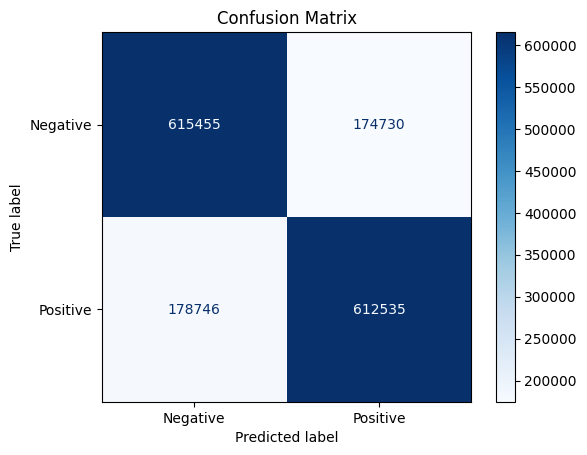

In [7]:
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

### Predicted vs True Class Distribution

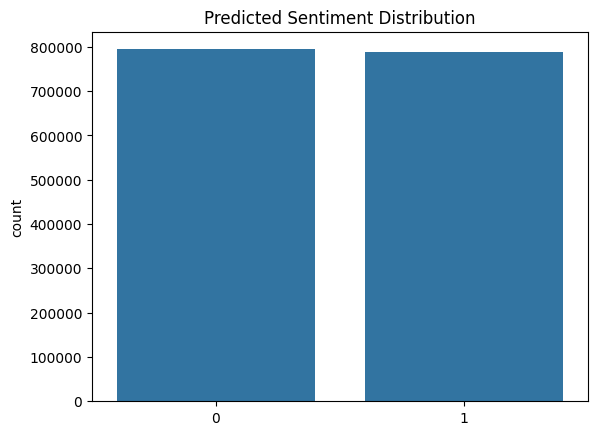

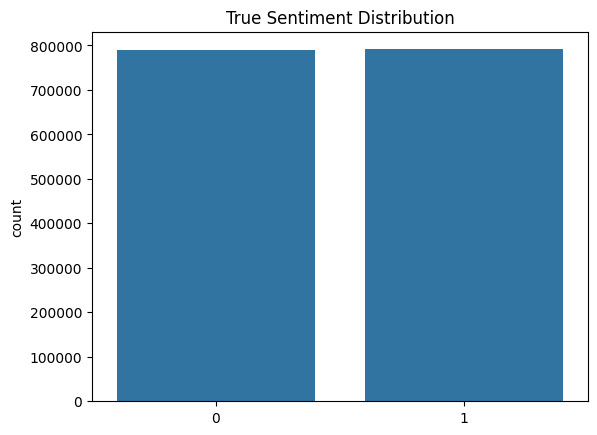

In [8]:
sns.countplot(x=y_pred)
plt.title("Predicted Sentiment Distribution")
plt.show()

sns.countplot(x=y)
plt.title("True Sentiment Distribution")
plt.show()